<center><img src="images/logo.png" alt="drawing" width="400" style="background-color:white; padding:1em;" /></center> <br/>

# ML through Application
## Module 1, Lab 5: Using Advanced AutoGluon Techniques

By the end of this document, you should be able to understand how to use [AutoGluon](https://auto.gluon.ai/stable/index.html#) to train a model and make a prediction on the full train dataset and generate a prediction file.

You will learn how to do the following:

- Train a model on a full dataset.
- Limit the time that a model trains for.
- Output a file that contains predictions.

---

You will explore a dataset that contains information about books. The goal is to predict book prices by using features about the books.

__Business problem:__ Books from a large database with several features cannot be listed for sale because one critical piece of information is missing: the price. 

__ML problem description:__ Predict book prices by using book features, such as genre, release data, ratings, and number of reviews.

This is a regression task (the training dataset has a book price column to use for labels). 

----

You will be presented with two kinds of exercises throughout the notebook: activities and challenges. <br/>

| <img style="float: center;" src="images/activity.png" alt="Activity" width="125"/>| <img style="float: center;" src="images/challenge.png" alt="Challenge" width="125"/>|
| --- | --- |
|<p style="text-align:center;">No coding is needed for an activity. You try to understand a concept, <br/>answer questions, or run a code cell.</p> |<p style="text-align:center;">Challenges are where you can practice your coding skills.</p>

## Index

- [Importing AutoGluon](#Importing-AutoGluon)
- [Getting the data](#Getting-the-data)
- [Model training with AutoGluon using the full dataset](#Model-training-with-AutoGluon-using-the-full-dataset)
- [Model prediction with AutoGluon](#Model-prediction-with-AutoGluon)

---
## Importing AutoGluon

Install and load the libraries that are needed to work with the tabular dataset.

In [1]:
%%capture
# Install libraries
!pip install -U -q -r requirements.txt

In [2]:
# Import libraries and utility functions
%load_ext autoreload
import pandas as pd

# Import the newly installed AutoGluon code library
from autogluon.tabular import TabularPredictor, TabularDataset

---
## Getting the data

Next, load the dataset into a Pandas DataFrame and preview the first rows of data.

__Note:__ You will use the [Amazon Product Reviews](https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews) dataset. For more information about this dataset, see the following resources:

- Ruining He and Julian McAuley. "Ups and Downs: Modeling the Visual Evolution of Fashion Trends with One-Class Collaborative Filtering." Proceedings of the 25th International Conference on World Wide Web, Geneva, Switzerland, April 2016. https://doi.org/10.1145/2872427.2883037.

- Julian McAuley, Christopher Targett, Qinfeng Shi, Anton van den Hengel. "Image-Based Recommendations on Styles and Substitutes." Proceedings of the 38th International Association for Computing Machinery (ACM) Special Interest Group on Information Retrieval (SIGIR) Conference on Research and Development in Information Retrieval, Santiago, Chile, August 2015. https://doi.org/10.1145/2766462.2767755.

In [12]:
df_train = TabularDataset(data="data/train.csv")
df_test = TabularDataset(data="data/test.csv")

NameError: name 'TabularDataset' is not defined

In [11]:
df_train.rename(
    columns={"auto_buy": "auto buy","auto_view": "auto view","category": "subcategory"}, 
     inplace=True,
    )

NameError: name 'df_train' is not defined

In [4]:
df_train.head()

,category,title,also_buy,brand,rank,also_view,main_cat,Price,asin,details,descriptionstring
0,[],"Books"" />",[],Joan M. Lexau,"1,683,587 in Books (",['0590457292'],Books,5.48,B001D4OHQA,"{'Publisher:': 'Scholastic (1974)', 'Language:...","Staining on cover, minimal wear and creasing. ..."
1,"['Books', 'Education & Teaching', 'Schools & T...",The Core Knowledge Sequence Content and Skill ...,"['0325008957', '1138188492', '1890517208', '14...",Core Knowledge Foundation,"974,014 in Books (","['0385316402', '1890517208', '1933486058', '19...",Books,21.40,B0071QRBFS,"{'Paperback:': '400 pages', 'Publisher:': 'Cor...",A double volume with two &quot;front covers.&q...
2,[],Stranger In The Woods,[],Leah Fried,"17,588,750 in Books (",[],Books,17.00,965906523X,"{'Hardcover:': '202 pages', 'Publisher:': 'Fel...",Stranger in the woods is a dramatic tale of co...
3,[],"Hansel and Gretel : A Fairy Opera, Vocal Score",[],"Adelheid ; Bache, Constance ; Humperdinck, E. ...","3,680,123 in Books (",['0793506603'],Books,10.95,B0011ZV86I,"{'Publisher:': 'G. Schirmer, Inc. (1957)', 'AS...","Complete vocal score, words and music."
4,"['Books', 'History', 'Asia']",Genghis Khan - Conqueror Of The World,[],Leo De Hartog,"5,083,249 in Books (",[],Books,3.50,B001LIQC7A,"{'Hardcover:': '230 pages', 'Publisher:': 'Bar...",a great biography of Ghengis Khan


---
## Model training with AutoGluon using the full dataset

Now you can use AutoGluon to train a model with the full dataset.  

Remember that you only need to provide the dataset and tell AutoGluon which column from the dataset you are trying to predict.

**Note:** AutoGluon uses certain defaults. For example, AutoGluon uses `root_mean_squared_error` as an evaluation metric for regression problems. For more information, see [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) in the sklearn documentation.

<div style="border: 4px solid coral; text-align: center; margin: auto;"> 
    <h3><i>Try it yourself!</i></h3>
    <p style="text-align:center; margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, run the code to train the model with the full dataset.
        <br><br><b>Important:</b> Use the <code>time_limit</code> parameter (in seconds) to limit the model training time to 20 minutes.
</p>
    <br>
</div>

### Why use a time limit?

It shouldn't take more than 20 minutes for this model to train, but the time limit ensures that training will have enough time to create a better model without running for an undetermined amount of time. Setting the training time in this lab will allow you to work on other projects and come back when you know that training has completed.

In a real-life situation, you can limit training time if you have a time or cost constraint.

In [5]:
############### CODE HERE ###############

predictor = TabularPredictor(label="Price").fit(df_train, time_limit=120,presets='high_quality_fast_inference_only_refit')


############## END OF CODE ##############

No path specified. Models will be saved in: "AutogluonModels/ag-20231103_015427/"
Preset alias specified: 'high_quality_fast_inference_only_refit' maps to 'high_quality'.
Presets specified: ['high_quality_fast_inference_only_refit']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20231103_015427/"
AutoGluon Version:  0.8.0
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Mon Apr 24 23:34:06 UTC 2023
Disk Space Avail:   19.81 GB / 20.96 GB (94.5%)
Train Data Rows:    5000
Train Data Columns: 10
Label Column: Price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (8537.94, 0.0, 45.08719, 190.23545)
	If 'regression' is not the correct proble

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, run the code to use Autogluon's <code>leaderboard</code> function to look at the model predictor performance.</p>
    <br>
</div>

In [13]:
############### CODE HERE ###############

df_leaderboard = predictor.leaderboard(silent=True)

############## END OF CODE ##############

NameError: name 'predictor' is not defined

---
## Model prediction with AutoGluon

Now that your model is trained, you can use it to predict prices.

You should always run a final model performance assessment by using data that the model didn't see (the test data). Test data is not used during training and can therefore give a performance assessment. You will use the test data to make predictions and generate a prediction file in the next step.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/activity.png" alt="Activity" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">To display part of the test dataset that you will use, run the following cell.</p>
    <br>
</div>

In [8]:
# Run this cell

df_test.head()

,category,title,also_buy,brand,rank,also_view,main_cat,Price,asin,details,descriptionstring
0,"['Books', 'Cookbooks, Food & Wine']",Sanjeev Kapoor`s Traditional Indian Cuisines P...,[],Visit Amazon's Sanjeev Kapoor Page,"4,203,444 in Books (","['1909487465', '8179916286']",Books,10.48,8179913112,"{'Paperback:': '104 pages', 'Publisher:': 'Pop...",): Sanjeev kapoor is a celebrity par excellenc...
1,[],"Christopher Radko: The first decade, 1986-1995...",[],aa,"2,006,465 in Books (","['0609604767', '0740725114', '0977909905', '06...",Books,315.20,B0091PA87K,"{'Publisher:': 'C. Radko for Starad, Inc; 2512...",Detailed pictorial look at the first 10 years ...
2,"['Books', 'Reference', 'Words, Language & Gram...",Navaho Stories in Basic Vocabulary (A Dolch Ba...,"['B0006AV7D8', 'B0007E0QTY']",Edward W. Dolch,"6,550,510 in Books (",[],Books,13.98,B000VF4TDS,"{'Hardcover:': '165 pages', 'Publisher:': 'The...",Dust jacket notes about the Dolch Basic Vocabu...
3,[],The Cultural Monuments of Tibet's Outer Provin...,"['9747534908', '9744800496', '9744800615']",Andreas Gruschke,"4,368,852 in Books (",[],Books,99.95,9747534592,"{'Paperback:': '284 pages', 'Publisher:': 'Whi...",This book presents the fascinating world of no...
4,[],The Danger by Dick Francis,"['0425204391', '042520846X', '0425237753', '04...",NaN,"8,401,025 in Books (","['042520846X', '0425204391', '0425194973', '04...",Books,12.75,B004HMQY3Y,"{'Publisher:': 'by Dick Francis (July 12, 2009...",Will be shipped from US. Used books may not in...


<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, run the code to use your trained model to make a prediction on the test dataset and save your predictions as a list</p>
    <br>
</div>

In [13]:
############### CODE HERE ###############

df_prediction = predictor.predict(df_test)
print("Predictions:  ", list(df_prediction)[:5])
perf = predictor.evaluate(df_test, auxiliary_metrics=False)

############## END OF CODE ##############

Predictions:   [39.87042236328125, 58.33924102783203, 37.35455322265625, 60.21027374267578, 43.51775360107422]


Evaluation: root_mean_squared_error on test data: -125.17008515618399
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -125.17008515618399
}



<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/activity.png" alt="Activity" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">One way to share the results of predictions for tabular data is to save a file. The file can be a simple .csv file that contains an ID to identify each data sample and the prediction value itself.</p>
    <br>
    <p style=" text-align: center; margin: auto;">To save your prediction file, run the following code cell. For this example, the ID is the <b>asin</b> column.</p>
    <br>
</div>

**Note:** If you haven't created the trained model to make predictions on the test dataset, you won't have the `price_prediction` DataFrame that is needed to create the prediction file. Running the following cell will generate an error. If you receive the error, use the `.predict()` function on the test dataset to create the `price_prediction` DataFrame.

In [14]:
# Define Pandas columns
df_prediction = pd.DataFrame(columns=["ID", "Price"])

# Createthe ID column from the ID list
df_prediction["ID"] = df_test["asin"].tolist()

# Create label column from price prediction list
df_prediction["Price"] = price_prediction

# Save as a .csv file
df_prediction.to_csv("./prediction.csv", index=False)

Run the following cell to see what the prediction data looks like.

In [15]:
df_prediction.head()

,ID,Price
0,8179913112,39.870422
1,B0091PA87K,58.339241
2,B000VF4TDS,37.354553
3,9747534592,60.210274
4,B004HMQY3Y,43.517754


In [16]:
leader_df = pd.read_csv('leaderboard5.csv')
leader_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-189.951417,0.622400,32.031647,0.001295,0.389171,2,False,5
1,LightGBMXT_BAG_L1,-189.970404,0.294844,19.942335,0.294844,19.942335,1,False,3
2,LightGBMXT_BAG_L2,-190.000305,5.226050,49.246328,0.346431,16.727072,2,False,6
3,WeightedEnsemble_L3,-190.000305,5.226851,49.402239,0.000801,0.155911,3,False,8
4,LightGBM_BAG_L1,-190.078126,0.326261,11.700141,0.326261,11.700141,1,False,4
5,LightGBM_BAG_L2,-190.186225,5.174876,40.165654,0.295257,7.646398,2,False,7
6,KNeighborsDist_BAG_L1,-219.002610,2.138174,0.390960,2.138174,0.390960,1,True,2
7,KNeighborsUnif_BAG_L1,-219.379625,2.120341,0.485821,2.120341,0.485821,1,True,1
8,KNeighborsUnif_BAG_L1_FULL,NaN,2.120341,0.485821,2.120341,0.485821,1,True,9
9,KNeighborsDist_BAG_L1_FULL,NaN,2.138174,0.390960,2.138174,0.390960,1,True,10


<Axes: title={'center': 'Distribution of Score Valuation'}, ylabel='Frequency'>

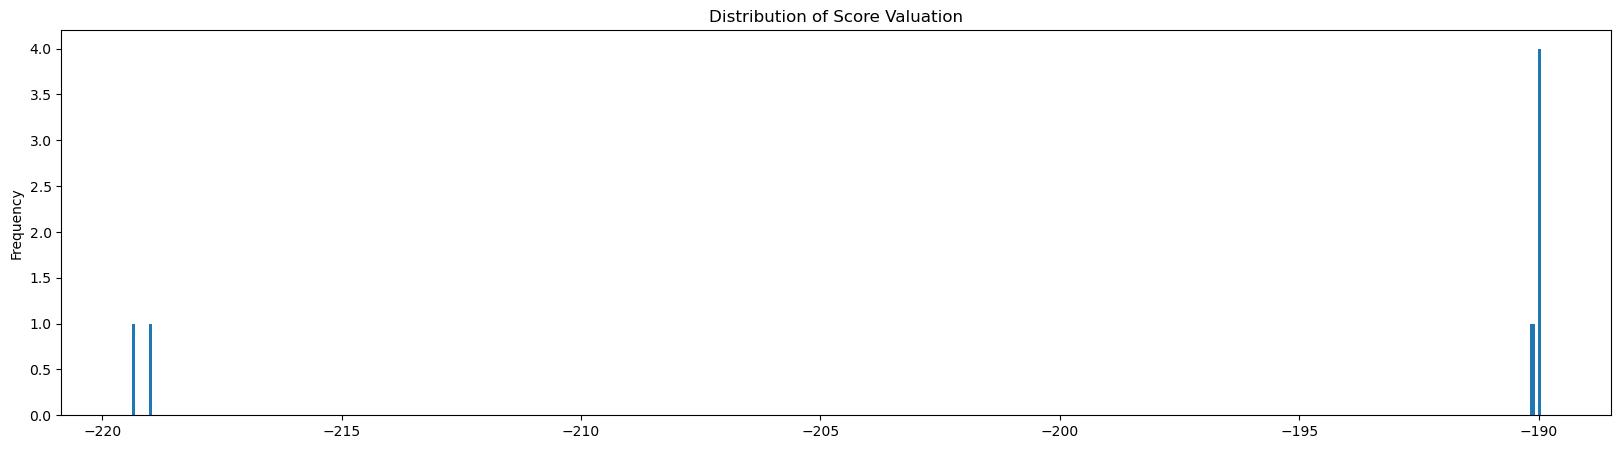

In [20]:
data/leaderboard.csv

<Axes: title={'center': 'Fit Analysis'}, xlabel='model', ylabel='score_val'>

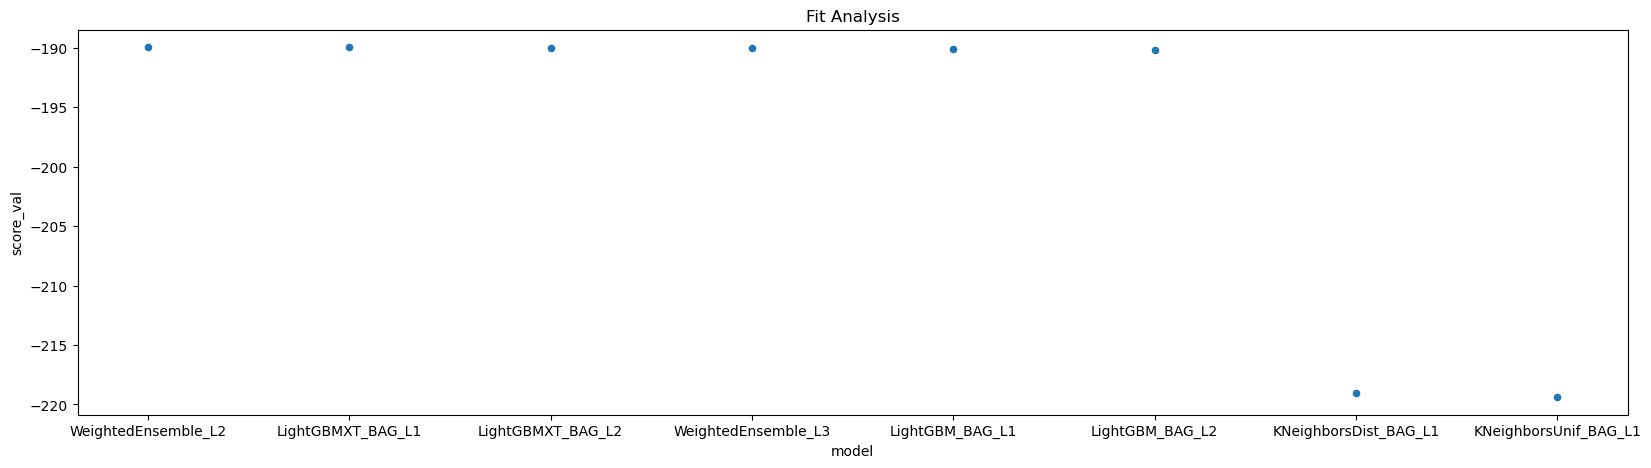

In [18]:
leader_df.plot(kind='scatter', x='model', y='score_val', title='Fit Analysis',figsize=(20, 5))

---
## Conclusion

You have now created a model with AutoGluon using the full dataset and made predictions using the updated model.

## Next lab

In the next lab, you will learn about using Jupyter notebooks for exploratory data analysis (EDA), particularly for categorical data.